## First Version

In [15]:
# C:\Users\sbai8\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
# interactivity=interactivity, compiler=compiler, result=result)

# After much research, I found that Pandas offers great tools for analyzing data sets. Plenty of documentation for the package
# can be found online, and there seems to be a great community behind its usage.
import pandas as pd
import numpy as np
import datetime

start = time.time()
begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

# -1's 
base = base.replace(-1, np.NaN)
test = test.replace(-1, np.NaN)

base_t = base.describe().transpose()
test_t = test.describe().transpose()

cols = base.columns
cols_dtypes = base.dtypes

num = 50000

base = base.head(num)
test = test.head(num)

total_counts = [0] * len(cols)
diff_counts = [0] * len(cols)
up_counts = [0] * len(cols)
down_counts = [0] * len(cols)

# option to exclude any attributes that do not change among the records in the files
excludeNoChange = False

for index, row in base.iterrows():
    acctno = row['acctno']
    
    base_row = base.loc[base['acctno'] == acctno]
    test_row = test.loc[test['acctno'] == acctno]
    
    less = base_row.lt(test_row).values.tolist()
    more = base_row.gt(test_row).values.tolist()
    equal = base_row.eq(test_row).values.tolist()

    for (x, y, z) in zip(less, more, equal):
        for i in range(0, len(cols)):
            if x[i] == True:
                down_counts[i] += 1
                diff_counts[i] += 1
            if y[i] == True:
                up_counts[i] += 1
                diff_counts[i] += 1
            total_counts[i] += 1
            i += 1

index = -1
data = []
df_columns = ['index', 'field', 'total_cnt', 'diff_cnt', 'diff_pct', 'up_cnt', 'up_pct', 'down_cnt', 'down_pct', 
              'mean_f1', 'mean_f2', 'mean_diff (f2-f1)', 'std_f1', 'std_f2', 'std_diff (f2-f1)']
for (x0, x1, x2, x3, x4, x5) in zip(cols_dtypes, cols, total_counts, diff_counts, up_counts, down_counts):
    
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue
    #row = [index, x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]
    if (x2 == 0):
        row = [index, x1, x2, x3, -1, x4, -1, x5, -1]
    else:
        row = [index, x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]
    
    if (x0 == np.int64 or x0 == np.float64):
        mean_f1 = base_t['mean'][x1]
        mean_f2 = test_t['mean'][x1]
        row.extend((mean_f1, mean_f2, mean_f2 - mean_f1))
        
        std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend((std_f1, std_f2, std_f2 - std_f1))
    else:
        row.extend((np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN))
    
    data.append(row)
    
print(datetime.datetime.now() - begin_time)
end = time.time()
print(f"TIME: {end - start}")

df = pd.DataFrame(data, columns=df_columns)
df.to_csv(f'RC Comparison, Runtime: {datetime.datetime.now() - begin_time}.csv', index=False)

1:15:09.443118


,index,field,total_cnt,diff_cnt,diff_pct,up_cnt,up_pct,down_cnt,down_pct,mean_f1,mean_f2,mean_diff (f2-f1),std_f1,std_f2,std_diff (f2-f1)
0,0,acctno,50000,0,0.000,0,0.000,0,0.000,6.771472e+04,6.771472e+04,0.000000e+00,4.106745e+04,4.106745e+04,0.000000e+00
1,1,rv_score_auto,50000,2037,4.074,535,1.070,1502,3.004,6.572900e+02,6.574824e+02,1.924200e-01,5.916082e+01,5.842521e+01,-7.356195e-01
2,2,rv_auto_reason,50000,134,0.268,80,0.160,54,0.108,NaN,NaN,NaN,NaN,NaN,NaN
3,3,rv_auto_reason2,50000,184,0.368,105,0.210,79,0.158,NaN,NaN,NaN,NaN,NaN,NaN
4,4,rv_auto_reason3,50000,256,0.512,144,0.288,112,0.224,NaN,NaN,NaN,NaN,NaN,NaN
5,5,rv_auto_reason4,50000,292,0.584,146,0.292,146,0.292,NaN,NaN,NaN,NaN,NaN,NaN
6,6,rv_score_bank,50000,2926,5.852,1834,3.668,1092,2.184,6.907928e+02,6.909645e+02,1.716600e-01,7.143026e+01,7.075728e+01,-6.729892e-01
7,7,rv_bank_reason,50000,117,0.234,69,0.138,48,0.096,NaN,NaN,NaN,NaN,NaN,NaN
8,8,rv_bank_reason2,50000,159,0.318,92,0.184,67,0.134,NaN,NaN,NaN,NaN,NaN,NaN
9,9,rv_bank_reason3,50000,223,0.446,124,0.248,99,0.198,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
"""
base_row = base.loc[base['acctno'] == acctno]
    test_row = test.loc[test['acctno'] == acctno]
    
    if (base_row.equals(test_row) == False):
        print(acctno)
        diff_count += 1;
    
print(diff_count)

"""

"""
i = 0
    for col in cols:
        if base_row[col].equals(test_row[col]) == False:
            diff_counts[i] += 1
            
            #less = base_row.lt(test_row)
            #print(less)
            #more = base_row.gt(test_row)
            #print(more)
            
            
        total_counts[i] += 1
        i += 1
        """

'\ni = 0\n    for col in cols:\n        if base_row[col].equals(test_row[col]) == False:\n            diff_counts[i] += 1\n            \n            #less = base_row.lt(test_row)\n            #print(less)\n            #more = base_row.gt(test_row)\n            #print(more)\n            \n            \n        total_counts[i] += 1\n        i += 1\n        '

In [ ]:
"""
    
index = -1
df = pd.DataFrame(columns=df_columns)
for (x1, x2, x3, x4, x5) in zip(cols, total_counts, diff_counts, up_counts, down_counts):
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue
    
    df = df.append({'index': index, 'field': x1, 'total_cnt': x2, 'diff_cnt': x3, 'diff_pct': x3/x2*100, 'up_cnt': x4, 'up_pct': x4/x2*100, 'down_cnt': x5, 'down_pct': x5/x2*100}, ignore_index=True)
    """


"""
std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend(std_f1, std_f2)
        
        row.append(base_t['mean'][x1])
        row.append(test_t['mean'][x1])
        row.append(test_t['mean'][x1] - base_t['mean'][x1])
        
"""

## Second Version

In [14]:
# C:\Users\sbai8\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
# interactivity=interactivity, compiler=compiler, result=result)

# After much research, I found that Pandas offers great tools for analyzing data sets. Plenty of documentation for the package
# can be found online, and there seems to be a great community behind its usage.
import pandas as pd
import numpy as np
import datetime

begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

# Across the two files, time_ms appears to be different for all records, so I made the decision to drop this attribute;
# otherwise, all records would be considered "different" because of this attribute
base = base.drop(columns=['time_ms'])
test = test.drop(columns=['time_ms'])

# -1's 
base = base.replace(-1, np.NaN)
test = test.replace(-1, np.NaN)

base_t = base.describe().transpose()
test_t = test.describe().transpose()

cols = base.columns
cols_dtypes = base.dtypes

num = 50000

base = base.head(num)
test = test.head(num)

total_counts = [0] * len(cols)
diff_counts = [0] * len(cols)
up_counts = [0] * len(cols)
down_counts = [0] * len(cols)

# option to exclude any attributes that do not change among the records in the files
excludeNoChange = False

for (indexf1, rowf1), (indexf2, rowf2) in zip(base.iterrows(), test.iterrows()):
    for i in range(0, len(cols)):
        if cols_dtypes[i] == np.int64 or cols_dtypes[i] == np.float64:
            if rowf1[i] < rowf2[i]:
                up_counts[i] += 1;
                diff_counts[i] += 1
            elif rowf1[i] > rowf2[i]:
                down_counts[i] += 1
                diff_counts[i] += 1
            total_counts[i] += 1
        
            
index = -1
data = []
df_columns = ['index', 'field', 'total_cnt', 'diff_cnt', 'diff_pct', 'up_cnt', 'up_pct', 'down_cnt', 'down_pct', 
              'mean_f1', 'mean_f2', 'mean_diff (f2-f1)', 'std_f1', 'std_f2', 'std_diff (f2-f1)']
for (x0, x1, x2, x3, x4, x5) in zip(cols_dtypes, cols, total_counts, diff_counts, up_counts, down_counts):
    
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue

    if (x2 == 0):
        row = [index, x1, x2, x3, -1, x4, -1, x5, -1]
    else:
        row = [index, x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]
    
    if (x0 == np.int64 or x0 == np.float64):
        mean_f1 = base_t['mean'][x1]
        mean_f2 = test_t['mean'][x1]
        row.extend((mean_f1, mean_f2, mean_f2 - mean_f1))
        
        std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend((std_f1, std_f2, std_f2 - std_f1))
    else:
        row.extend((np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN))
    
    data.append(row)
    
print(datetime.datetime.now() - begin_time)


df = pd.DataFrame(data, columns=df_columns)
df

0:11:04.743281


,index,field,total_cnt,diff_cnt,diff_pct,up_cnt,up_pct,down_cnt,down_pct,mean_f1,mean_f2,mean_diff (f2-f1),std_f1,std_f2,std_diff (f2-f1)
0,0,acctno,50000,0,0.000,0,0.000,0,0.000,6.771472e+04,6.771472e+04,0.000000e+00,4.106745e+04,4.106745e+04,0.000000e+00
1,1,rv_score_auto,50000,2037,4.074,1502,3.004,535,1.070,6.572900e+02,6.574824e+02,1.924200e-01,5.916082e+01,5.842521e+01,-7.356195e-01
2,2,rv_auto_reason,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
3,3,rv_auto_reason2,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
4,4,rv_auto_reason3,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
5,5,rv_auto_reason4,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
6,6,rv_score_bank,50000,2926,5.852,1092,2.184,1834,3.668,6.907928e+02,6.909645e+02,1.716600e-01,7.143026e+01,7.075728e+01,-6.729892e-01
7,7,rv_bank_reason,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
8,8,rv_bank_reason2,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN
9,9,rv_bank_reason3,0,0,-1.000,0,-1.000,0,-1.000,NaN,NaN,NaN,NaN,NaN,NaN


## Most Recent Working Version

In [7]:
# File dimensions: 50000 rows × 40 columns

# pandas offers great tools for analyzing data sets, provides in-memory 2d table object called Dataframe
# plenty of documentation for the package can be found online, seems to be a great community behind its usage
import pandas as pd

# numpy package mostly used for determining data types of data values
import numpy as np

# time and datetime packages used for determining the runtime of code
import time
import datetime

start = time.time()
begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

# cols represents the names of the attributes in the file
cols = base.columns
# index_ used to parse columns for testing purposes
index_ = cols.tolist()

# parse data for testing purposes to reduce size of data input
# 0:20
# 150:200
#del index_[0:20]
#base = base.drop(columns=index_)
#test = test.drop(columns=index_)

# reinitialize cols to updated data input size (testing purposes)
cols = base.columns
# cols_dtypes used to determine the type of data that each attribute represents
cols_dtypes = base.dtypes

# num used to parse data input
num = 50000
base = base.head(num)
test = test.head(num)

# initialize counts that will be used to determine
total_counts = [0] * len(cols)
diff_counts = [0] * len(cols)
up_counts = [0] * len(cols)
down_counts = [0] * len(cols)

# iterates through each row of the base and test file
for (indexf1, rowf1), (indexf2, rowf2) in zip(base.iterrows(), test.iterrows()):
    
    # iterates through each attribute of a record
    for i in range(0, len(cols)):
        
        # data is a numerical value
        if cols_dtypes[i] == np.int64 or cols_dtypes[i] == np.float64:
            
            # at least one record has data for this specific attribute
            if not(rowf1[i] == -1 and rowf2[i] == -1):
                total_counts[i] += 1

            # f1 < f2 => increase
            if rowf1[i] < rowf2[i]:
                up_counts[i] += 1
                diff_counts[i] += 1
                
            # f1 > f2 => decrease
            elif rowf1[i] > rowf2[i]:
                down_counts[i] += 1
                diff_counts[i] += 1
        
        # data is a string value
        else:
            
            # at least one record has data for this specific attribute
            if not(rowf1[i] == '-1' and rowf2[i] == '-1'):
                total_counts[i] += 1
            
            # special check for NaN values (not all NaN values equal each other for some reason?)
            if not(pd.isna(rowf1[i]) or pd.isna(rowf2[i])):
                if (rowf1[i] != rowf2[i]):
                    diff_counts[i] += 1

# -1 entries will have adverse effects on numerical statistical measures such as mean and standard deviation;
# replacing all -1's with NaN bypasses these unintended effects for a more accurate description of the data
base = base.replace(-1, np.NaN)
test = test.replace(-1, np.NaN)

# base_t and test_t hold information on mean and std, applied transpose for easy access of these statistical measures
base_t = base.describe().transpose()
test_t = test.describe().transpose()

index = -1
data = []
df_columns = ['index', 'dtype', 'field', 'total_cnt', 'diff_cnt', 'diff_pct', 'up_cnt', 'up_pct', 'down_cnt', 'down_pct', 
              'mean_f1', 'mean_f2', 'mean_diff (f2-f1)', 'std_f1', 'std_f2', 'std_diff (f2-f1)', 'min_f1', 'min_f2', 
              'max_f1', 'max_f2']

# option to exclude any attributes that experienced no changes across all records between the two files
excludeNoChange = False
for (x0, x1, x2, x3, x4, x5) in zip(cols_dtypes, cols, total_counts, diff_counts, up_counts, down_counts):
    
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue
    
    # handles special case where there is a count of 0 to avoid division by 0 error
    if (x2 == 0):
        row = [index, cols_dtypes[index], x1, x2, x3, -1, x4, -1, x5, -1]
    else:
        row = [index, cols_dtypes[index], x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]

    # numerical statistical measures for numerical data values ONLY
    if (x0 == np.int64 or x0 == np.float64):
        mean_f1 = base_t['mean'][x1]
        mean_f2 = test_t['mean'][x1]
        row.extend((mean_f1, mean_f2, mean_f2 - mean_f1))
        
        std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend((std_f1, std_f2, std_f2 - std_f1))
        
        min_f1 = base_t['min'][x1]
        min_f2 = test_t['min'][x1]
        row.extend((min_f1, min_f2))
        
        max_f1 = base_t['max'][x1]
        max_f2 = test_t['max'][x1]
        row.extend((max_f1, max_f2))
    
    else:
        row.extend((np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 'N/A', 'N/A', 'N/A', 'N/A'))
    
    data.append(row)

    
print(datetime.datetime.now() - begin_time)
end = time.time()
print(f"TIME: {end - start}")
    
df = pd.DataFrame(data, columns=df_columns)
title = f'RC Comparison, Runtime - {(int)(end-start)}s.csv'
df.to_csv(title, index=False)

0:03:11.330873
TIME: 191.3318703174591


## Work in Progress

In [3]:
# pandas offers great tools for analyzing data sets, provides in-memory 2d table object called Dataframe
# plenty of documentation for the package can be found online, seems to be a great community behind its usage
import pandas as pd

# numpy package mostly used for determining data types of data values
import numpy as np

# time and datetime packages used for determining the runtime of code
import time
import datetime

start = time.time()
begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

# cols represents the names of the attributes in the file
cols = base.columns
# index_ used to parse columns for testing purposes
index_ = cols.tolist()

# parse data for testing purposes to reduce size of data input
# 0:20
# 150:200
#del index_[0:20]
#base = base.drop(columns=index_)
#test = test.drop(columns=index_)

# reinitialize cols to updated data input size (testing purposes)
cols = base.columns
# cols_dtypes used to determine the type of data that each attribute represents
cols_dtypes = base.dtypes

# num used to parse data input
num = 50000
base = base.head(num)
test = test.head(num)

# initialize counts that will be used to determine
total_counts = [0] * len(cols)
diff_counts = [0] * len(cols)
up_counts = [0] * len(cols)
down_counts = [0] * len(cols)

# iterates through each row of the base and test file
for (indexf1, rowf1), (indexf2, rowf2) in zip(base.iterrows(), test.iterrows()):
    
    # iterates through each attribute of a record
    for i in range(0, len(cols)):
        
        # data is a numerical value
        if cols_dtypes[i] == np.int64 or cols_dtypes[i] == np.float64:
            
            # at least one record has data for this specific attribute
            if not(rowf1[i] == -1 and rowf2[i] == -1):
                total_counts[i] += 1

            # f1 < f2 => increase
            if rowf1[i] < rowf2[i]:
                up_counts[i] += 1
                diff_counts[i] += 1
                
            # f1 > f2 => decrease
            elif rowf1[i] > rowf2[i]:
                down_counts[i] += 1
                diff_counts[i] += 1
        
        # data is a string value
        else:
            
            # at least one record has data for this specific attribute
            if not(rowf1[i] == '-1' and rowf2[i] == '-1'):
                total_counts[i] += 1
            
            # special check for NaN values (not all NaN values equal each other for some reason?)
            if not(pd.isna(rowf1[i]) or pd.isna(rowf2[i])):
                if (rowf1[i] != rowf2[i]):
                    diff_counts[i] += 1

# -1 entries will have adverse effects on numerical statistical measures such as mean and standard deviation;
# replacing all -1's with NaN bypasses these unintended effects for a more accurate description of the data
base = base.replace(-1, np.NaN)
test = test.replace(-1, np.NaN)

# base_t and test_t hold information on mean and std, applied transpose for easy access of these statistical measures
base_t = base.describe().transpose()
test_t = test.describe().transpose()

index = -1
data = []
df_columns = ['index', 'dtype', 'field', 'total_cnt', 'diff_cnt', 'diff_pct', 'up_cnt', 'up_pct', 'down_cnt', 'down_pct', 
              'mean_f1', 'mean_f2', 'mean_diff (f2-f1)', 'std_f1', 'std_f2', 'std_diff (f2-f1)', 'min_f1', 'min_f2', 
              'max_f1', 'max_f2']

# option to exclude any attributes that experienced no changes across all records between the two files
excludeNoChange = False
for (x0, x1, x2, x3, x4, x5) in zip(cols_dtypes, cols, total_counts, diff_counts, up_counts, down_counts):
    
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue
    
    # handles special case where there is a count of 0 to avoid division by 0 error
    if (x2 == 0):
        row = [index, cols_dtypes[index], x1, x2, x3, -1, x4, -1, x5, -1]
    else:
        row = [index, cols_dtypes[index], x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]

    # numerical statistical measures for numerical data values ONLY
    if (x0 == np.int64 or x0 == np.float64):
        mean_f1 = base_t['mean'][x1]
        mean_f2 = test_t['mean'][x1]
        row.extend((mean_f1, mean_f2, mean_f2 - mean_f1))
        
        std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend((std_f1, std_f2, std_f2 - std_f1))
        
        min_f1 = base_t['min'][x1]
        min_f2 = test_t['min'][x1]
        row.extend((min_f1, min_f2))
        
        max_f1 = base_t['max'][x1]
        max_f2 = test_t['max'][x1]
        row.extend((max_f1, max_f2))
    
    else:
        row.extend((np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 'N/A', 'N/A', 'N/A', 'N/A'))
    
    data.append(row)

    
print(datetime.datetime.now() - begin_time)
end = time.time()
print(f"TIME: {end - start}")
    
df = pd.DataFrame(data, columns=df_columns)
df

KeyboardInterrupt: 

In [4]:
# pandas offers great tools for analyzing data sets, provides in-memory 2d table object called Dataframe
# plenty of documentation for the package can be found online, seems to be a great community behind its usage
import pandas as pd

# numpy package mostly used for determining data types of data values
import numpy as np

# time and datetime packages used for determining the runtime of code
import time
import datetime

start = time.time()
begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

base

,time_ms,acctno,rv_score_auto,rv_auto_reason,rv_auto_reason2,rv_auto_reason3,rv_auto_reason4,rv_score_bank,rv_bank_reason,rv_bank_reason2,...,historydate,did,fnamepop,lnamepop,addrpop,ssnlength,dobpop,emailpop,ipaddrpop,hphnpop
0,570,1,678,9A,27,99,10,736,9A,27,...,999999,8.526618e+09,1,1,1,9,1,0,0,1
1,1517,10,744,27,10,73,NaN,757,27,10,...,999999,1.960145e+09,1,1,1,9,1,0,0,1
2,1628,100,702,27,99,10,73,757,27,99,...,999999,7.186521e+08,1,1,1,4,1,0,0,1
3,546,1000,638,97,9E,27,99,680,97,9E,...,999999,9.830791e+07,1,1,1,9,1,0,0,1
4,494,10000,658,9A,9E,27,99,708,9A,9E,...,999999,1.395894e+09,1,1,1,9,1,0,0,1
5,1967,100004,704,PV,27,99,10,709,PV,27,...,999999,3.557564e+08,1,1,1,9,1,0,0,1
6,361,100008,602,PV,9E,9D,28,702,PV,9E,...,999999,4.583219e+10,1,1,1,9,1,0,0,1
7,1637,100011,629,98,9A,9E,25,641,98,9A,...,999999,4.635371e+08,1,1,1,9,1,0,0,1
8,1476,100012,731,27,99,10,73,762,27,99,...,999999,2.765446e+09,1,1,1,9,1,0,0,1
9,1603,100014,606,98,9A,9E,9J,589,98,9A,...,999999,1.912860e+11,1,1,1,9,1,0,0,1


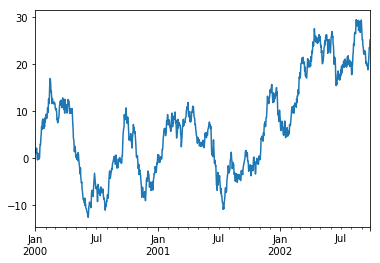

In [98]:
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [16]:
# C:\Users\sbai8\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
# interactivity=interactivity, compiler=compiler, result=result)

# After much research, I found that Pandas offers great tools for analyzing data sets. Plenty of documentation for the package
# can be found online, and there seems to be a great community behind its usage.
import pandas as pd
import numpy as np
import datetime

begin_time = datetime.datetime.now()

# Reading in the two csv files that the script will apply the comparison on
base = pd.read_csv("RC base.csv", low_memory=False)
test = pd.read_csv("RC test.csv", low_memory=False)

# Across the two files, time_ms appears to be different for all records, so I made the decision to drop this attribute;
# otherwise, all records would be considered "different" because of this attribute
base = base.drop(columns=['time_ms'])
test = test.drop(columns=['time_ms'])

# -1's 
base = base.replace(-1, np.NaN)
test = test.replace(-1, np.NaN)

cols = base.columns
cols_dtypes = base.dtypes

num = 100

base = base.head(num)
test = test.head(num)

total_counts = [0] * len(cols)
diff_counts = [0] * len(cols)
up_counts = [0] * len(cols)
down_counts = [0] * len(cols)

# option to exclude any attributes that do not change among the records in the files
excludeNoChange = False

for (indexf1, rowf1), (indexf2, rowf2) in zip(base.iterrows(), test.iterrows()):
    for i in range(0, len(cols)):
        if cols_dtypes[i] == np.int64 or cols_dtypes[i] == np.float64:
            if rowf1[i] < rowf2[i]:
                up_counts[i] += 1;
                diff_counts[i] += 1
            elif rowf1[i] > rowf2[i]:
                down_counts[i] += 1
                diff_counts[i] += 1
            total_counts[i] += 1
        else:
        
            if cols[i] == 'rv_auto_reason4':
                print(type(rowf1[i]))
                      
            if rowf1[i] == 'nan':
                print("NaN")
            print(cols[i], rowf1[i], rowf2[i], rowf1[i] == rowf2[i])

base_t = base.describe().transpose()
test_t = test.describe().transpose()
            
index = -1
data = []
df_columns = ['index', 'field', 'total_cnt', 'diff_cnt', 'diff_pct', 'up_cnt', 'up_pct', 'down_cnt', 'down_pct', 
              'mean_f1', 'mean_f2', 'mean_diff (f2-f1)', 'std_f1', 'std_f2', 'std_diff (f2-f1)']
for (x0, x1, x2, x3, x4, x5) in zip(cols_dtypes, cols, total_counts, diff_counts, up_counts, down_counts):
    
    index += 1
    if excludeNoChange == True:
        if x3 == 0:
            continue

    if (x2 == 0):
        row = [index, x1, x2, x3, -1, x4, -1, x5, -1]
    else:
        row = [index, x1, x2, x3, x3/x2*100, x4, x4/x2*100, x5, x5/x2*100]
    
    if (x0 == np.int64 or x0 == np.float64):
        mean_f1 = base_t['mean'][x1]
        mean_f2 = test_t['mean'][x1]
        row.extend((mean_f1, mean_f2, mean_f2 - mean_f1))
        
        std_f1 = base_t['std'][x1]
        std_f2 = test_t['std'][x1]
        row.extend((std_f1, std_f2, std_f2 - std_f1))
    else:
        row.extend((np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN))
    
    data.append(row)
    
print(datetime.datetime.now() - begin_time)

               

df = pd.DataFrame(data, columns=df_columns)
df.to_csv(f'RC Comparison {}.csv', index=False)
df

rv_auto_reason 9A 9A True
rv_auto_reason2 27 27 True
rv_auto_reason3 99 99 True
<class 'str'>
rv_auto_reason4 10 10 True
rv_bank_reason 9A 9A True
rv_bank_reason2 27 27 True
rv_bank_reason3 99 99 True
rv_bank_reason4 10 10 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 27 27 True
rv_telecom_reason3 99 99 True
rv_telecom_reason4 10 10 True
rv_money_reason 9A 9A True
rv_money_reason2 27 27 True
rv_money_reason3 99 99 True
rv_money_reason4 10 10 True
ssnlength 9 9 True
rv_auto_reason 27 27 True
rv_auto_reason2 10 10 True
rv_auto_reason3 73 73 True
<class 'float'>
rv_auto_reason4 nan nan False
rv_bank_reason 27 27 True
rv_bank_reason2 10 10 True
rv_bank_reason3 73 73 True
rv_bank_reason4 nan nan False
rv_telecom_reason 27 27 True
rv_telecom_reason2 10 10 True
rv_telecom_reason3 73 73 True
rv_telecom_reason4 nan nan False
rv_money_reason 27 27 True
rv_money_reason2 10 10 True
rv_money_reason3 73 73 True
rv_money_reason4 nan nan False
ssnlength 9 9 True
rv_auto_reason 27 27 True
rv_aut

rv_money_reason2 27 27 True
rv_money_reason3 10 10 True
rv_money_reason4 73 73 True
ssnlength 9 9 True
rv_auto_reason 98 98 True
rv_auto_reason2 9A 9A True
rv_auto_reason3 25 25 True
<class 'str'>
rv_auto_reason4 27 27 True
rv_bank_reason 98 98 True
rv_bank_reason2 9A 9A True
rv_bank_reason3 25 25 True
rv_bank_reason4 27 27 True
rv_telecom_reason 98 98 True
rv_telecom_reason2 9A 9A True
rv_telecom_reason3 25 25 True
rv_telecom_reason4 27 27 True
rv_money_reason 98 98 True
rv_money_reason2 9A 9A True
rv_money_reason3 25 25 True
rv_money_reason4 27 27 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 27 27 True
rv_auto_reason3 99 99 True
<class 'str'>
rv_auto_reason4 10 10 True
rv_bank_reason 9A 9A True
rv_bank_reason2 27 27 True
rv_bank_reason3 99 99 True
rv_bank_reason4 10 10 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 27 27 True
rv_telecom_reason3 99 99 True
rv_telecom_reason4 10 10 True
rv_money_reason 9A 9A True
rv_money_reason2 27 27 True
rv_money_reason3 9

rv_money_reason2 27 27 True
rv_money_reason3 11 11 True
rv_money_reason4 12 12 True
ssnlength 9 9 True
rv_auto_reason 27 27 True
rv_auto_reason2 99 99 True
rv_auto_reason3 10 10 True
<class 'str'>
rv_auto_reason4 73 73 True
rv_bank_reason 27 27 True
rv_bank_reason2 99 99 True
rv_bank_reason3 10 10 True
rv_bank_reason4 73 73 True
rv_telecom_reason 27 27 True
rv_telecom_reason2 99 99 True
rv_telecom_reason3 10 10 True
rv_telecom_reason4 73 73 True
rv_money_reason 27 27 True
rv_money_reason2 99 99 True
rv_money_reason3 10 10 True
rv_money_reason4 73 73 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 9E 9E True
rv_auto_reason3 28 28 True
<class 'str'>
rv_auto_reason4 27 27 True
rv_bank_reason 9A 9A True
rv_bank_reason2 9E 9E True
rv_bank_reason3 28 28 True
rv_bank_reason4 27 27 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 9E 9E True
rv_telecom_reason3 28 28 True
rv_telecom_reason4 27 27 True
rv_money_reason 9A 9A True
rv_money_reason2 9E 9E True
rv_money_reason3 2

rv_money_reason 9B 9B True
rv_money_reason2 PV PV True
rv_money_reason3 9E 9E True
rv_money_reason4 27 27 True
ssnlength 9 9 True
rv_auto_reason 27 27 True
rv_auto_reason2 7 7 True
rv_auto_reason3 73 73 True
<class 'float'>
rv_auto_reason4 nan nan False
rv_bank_reason 27 27 True
rv_bank_reason2 7 7 True
rv_bank_reason3 73 73 True
rv_bank_reason4 nan nan False
rv_telecom_reason 27 27 True
rv_telecom_reason2 7 7 True
rv_telecom_reason3 73 73 True
rv_telecom_reason4 nan nan False
rv_money_reason 27 27 True
rv_money_reason2 7 7 True
rv_money_reason3 73 73 True
rv_money_reason4 nan nan False
ssnlength 9 9 True
rv_auto_reason 25 9D False
rv_auto_reason2 27 25 False
rv_auto_reason3 10 27 False
<class 'str'>
rv_auto_reason4 73 10 False
rv_bank_reason 25 25 True
rv_bank_reason2 27 27 True
rv_bank_reason3 10 9D False
rv_bank_reason4 73 10 False
rv_telecom_reason 25 25 True
rv_telecom_reason2 27 27 True
rv_telecom_reason3 10 9D False
rv_telecom_reason4 73 10 False
rv_money_reason 25 25 True
rv_mo

rv_telecom_reason2 PV PV True
rv_telecom_reason3 27 27 True
rv_telecom_reason4 10 10 True
rv_money_reason 9B 9B True
rv_money_reason2 PV PV True
rv_money_reason3 27 27 True
rv_money_reason4 10 10 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 27 27 True
rv_auto_reason3 99 99 True
<class 'str'>
rv_auto_reason4 10 10 True
rv_bank_reason 9A 9A True
rv_bank_reason2 27 27 True
rv_bank_reason3 99 99 True
rv_bank_reason4 10 10 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 27 27 True
rv_telecom_reason3 99 99 True
rv_telecom_reason4 10 10 True
rv_money_reason 9A 9A True
rv_money_reason2 27 27 True
rv_money_reason3 99 99 True
rv_money_reason4 10 10 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 28 28 True
rv_auto_reason3 27 27 True
<class 'str'>
rv_auto_reason4 99 99 True
rv_bank_reason 9A 9A True
rv_bank_reason2 28 28 True
rv_bank_reason3 27 27 True
rv_bank_reason4 99 99 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 28 28 True
rv_telecom_reaso

rv_telecom_reason 9A 9A True
rv_telecom_reason2 PV PV True
rv_telecom_reason3 27 27 True
rv_telecom_reason4 99 99 True
rv_money_reason 9A 9A True
rv_money_reason2 PV PV True
rv_money_reason3 27 27 True
rv_money_reason4 99 99 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 9D 9D True
rv_auto_reason3 27 27 True
<class 'str'>
rv_auto_reason4 10 10 True
rv_bank_reason 9A 9A True
rv_bank_reason2 27 27 True
rv_bank_reason3 9D 9D True
rv_bank_reason4 10 10 True
rv_telecom_reason 9A 9A True
rv_telecom_reason2 27 27 True
rv_telecom_reason3 9D 9D True
rv_telecom_reason4 10 10 True
rv_money_reason 9A 9A True
rv_money_reason2 27 27 True
rv_money_reason3 9D 9D True
rv_money_reason4 10 10 True
ssnlength 9 9 True
rv_auto_reason 9A 9A True
rv_auto_reason2 PV PV True
rv_auto_reason3 27 27 True
<class 'str'>
rv_auto_reason4 99 99 True
rv_bank_reason 9A 9A True
rv_bank_reason2 PV PV True
rv_bank_reason3 27 27 True
rv_bank_reason4 99 99 True
rv_telecom_reason 9A 9A True
rv_telecom_reason

,index,field,total_cnt,diff_cnt,diff_pct,up_cnt,up_pct,down_cnt,down_pct,mean_f1,mean_f2,mean_diff (f2-f1),std_f1,std_f2,std_diff (f2-f1)
0,0,acctno,100,0,0.0,0,0.0,0,0.0,9.324635e+04,9.324635e+04,0.00,2.521042e+04,2.521042e+04,0.000000e+00
1,1,rv_score_auto,100,3,3.0,1,1.0,2,2.0,6.579600e+02,6.578000e+02,-0.16,6.510829e+01,6.512071e+01,1.242256e-02
2,2,rv_auto_reason,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,rv_auto_reason2,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,rv_auto_reason3,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,rv_auto_reason4,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,rv_score_bank,100,7,7.0,2,2.0,5,5.0,6.992700e+02,6.987100e+02,-0.56,7.416578e+01,7.380267e+01,-3.631077e-01
7,7,rv_bank_reason,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,rv_bank_reason2,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,rv_bank_reason3,0,0,-1.0,0,-1.0,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
